# Introduction

Welcome! This analysis explores the statistics of the 2018 Major League Baseball (MLB) season, examining both individual player and team performance. The goal of this project is to ascertain whether there was any correlation between the top players and the most successful teams.

# Import Libraries


In [98]:
import requests
import json
import pandas as pd
import numpy as np
from os import path
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'squarify'

# Load Datasets

There are two datasets used in this project. 

    1) atbats.csv

    2) teams.csv

In [2]:
# Define the file path for the atbats.csv
file_path = r'D:\Code LOU\data_analysis_capstone\Data\atbats.csv'

In [3]:
# Read the atbats.csv file
data_atbats = pd.read_csv(file_path)

In [4]:
# The variable data_atbats contains the data from the atbats.csv file
# This will print the first 10 rows of the DataFrame
print(data_atbats.head(11)) 

               name  year  stint team  lg    G   AB    R    H  2B  ...    SB  \
0        Jose Abreu  2018      1  CHA  AL  128  499   68  132  36  ...   2.0   
1      Ronald Acuna  2018      1  ATL  NL  111  433   78  127  26  ...  16.0   
2      Willy Adames  2018      1  TBA  AL   85  288   43   80   7  ...   6.0   
3        Matt Adams  2018      1  WAS  NL   94  249   37   64   9  ...   0.0   
4        Jim Adduci  2018      1  DET  AL   59  176   19   47   8  ...   1.0   
5    Ehire Adrianza  2018      1  MIN  AL  114  335   42   84  23  ...   5.0   
6     Jesus Aguilar  2018      1  MIL  NL  149  492   80  135  25  ...   0.0   
7        Nick Ahmed  2018      1  ARI  NL  153  516   61  121  33  ...   5.0   
8      Ozzie Albies  2018      1  ATL  NL  158  639  105  167  40  ...  14.0   
9   Scott Alexander  2018      1  LAN  NL   73    5    0    0   0  ...   0.0   
10     Jorge Alfaro  2018      1  PHI  NL  108  344   35   90  16  ...   3.0   

     CS  BB     SO  IBB   HBP   SH    S

In [5]:
# Check the name of each coloumns of dataset 1
print(data_atbats.columns)

Index(['name', 'year', 'stint', 'team', 'lg', 'G', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
       'playerID'],
      dtype='object')


In [6]:
# View the data dimensions: 528 rolls and 23 coloumns 
print(data_atbats.shape)

(528, 23)


I applied the same methodology to load and conduct an initial exploration of the second dataset. This included importing the data, performing preliminary assessments for data quality and structure, and identifying key variables relevant to the analysis objectives.

In [7]:
# Define the file path for the teams.csv
file_path = r'D:\Code LOU\data_analysis_capstone\Data\teams.csv'

In [8]:
# Read the atbats.csv file
data_teams = pd.read_csv(file_path)

In [9]:
# The variable data_players contains the data from the players.csv file
# This will print the first 10 rows of the DataFrame
print(data_teams.head(11)) 

    yearID lgID teamID divID  Rank    G    W    L DivWin WCWin  ...  BBA  \
0     2018   NL    ARI     W     3  162   82   80      N     N  ...  522   
1     2018   NL    ATL     E     1  162   90   72      Y     N  ...  635   
2     2018   AL    BAL     E     5  162   47  115      N     N  ...  589   
3     2018   AL    BOS     E     1  162  108   54      Y     N  ...  512   
4     2018   AL    CHA     C     4  162   62  100      N     N  ...  653   
5     2018   NL    CHN     C     2  163   95   68      N     Y  ...  622   
6     2018   NL    CIN     C     5  162   67   95      N     N  ...  532   
7     2018   AL    CLE     C     1  162   91   71      Y     N  ...  407   
8     2018   NL    COL     W     2  163   91   72      N     Y  ...  525   
9     2018   AL    DET     C     3  162   64   98      N     N  ...  491   
10    2018   AL    HOU     W     1  162  103   59      Y     N  ...  435   

     SOA    E   DP     FP                  name                         park  \
0   144

In [10]:
# View the data dimensions: 30 rolls and 43 coloumns
print(data_teams.shape)

(30, 43)


In [11]:
## Check the name of each coloumns of dataset 2
print(data_teams.columns)

Index(['yearID', 'lgID', 'teamID', 'divID', 'Rank', 'G', 'W', 'L', 'DivWin',
       'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO',
       'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts',
       'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park',
       'attendance', 'BPF', 'PPF'],
      dtype='object')


These two files contain the essential player performance data and team statistics necessary to address our research question. However, they require cleaning and the calculation of key baseball hitter metrics, such as Batting Average (AVG), On-Base percentage (OPS), Runs Batted in (RBI) and more complex calculations like Wins Above Replacement (WAR), among others.

# Clean and merge the data and calucuate new values

This initial phase of cleaning we will lay the groundwork for our analysis, enabling us to understand the range, and trends,  within the dataset. By examining the at-bat data, we'll be able to identify any anomalies, patterns, or insights that could influence player evaluations. 

In [12]:
# initialize empty list to store the atbat data
data_list = []

data = {
    'atbat': r'D:\Code LOU\data_analysis_capstone\Data\atbats.csv'
    }

data_list = []

# loop through each key-value pair in the data dictionary
for key, file_path in data.items():
    # read the CSV file into a dataframe
    atbat_df = pd.read_csv(file_path)
    
    # append the dataframe to data_list
    data_list.append(atbat_df)
    
# concatenate all dataframes in the list into a single atbats dataframe
atbats_df = pd.concat(data_list, ignore_index=True)


In [13]:
# display first 10 rows the data to examine
atbats_df.head(11)

,name,year,stint,team,lg,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,playerID
0,Jose Abreu,2018,1,CHA,AL,128,499,68,132,36,...,2.0,0.0,37,109.0,7.0,11.0,0.0,6.0,14.0,abreujo02
1,Ronald Acuna,2018,1,ATL,NL,111,433,78,127,26,...,16.0,5.0,45,123.0,2.0,6.0,0.0,3.0,4.0,acunaro01
2,Willy Adames,2018,1,TBA,AL,85,288,43,80,7,...,6.0,5.0,31,95.0,3.0,1.0,1.0,2.0,6.0,adamewi01
3,Matt Adams,2018,1,WAS,NL,94,249,37,64,9,...,0.0,0.0,24,55.0,2.0,4.0,0.0,0.0,6.0,adamsma01
4,Jim Adduci,2018,1,DET,AL,59,176,19,47,8,...,1.0,0.0,6,45.0,0.0,0.0,2.0,1.0,2.0,adducji02
5,Ehire Adrianza,2018,1,MIN,AL,114,335,42,84,23,...,5.0,1.0,24,82.0,2.0,1.0,4.0,2.0,4.0,adriaeh01
6,Jesus Aguilar,2018,1,MIL,NL,149,492,80,135,25,...,0.0,0.0,58,143.0,3.0,6.0,0.0,10.0,19.0,aguilje01
7,Nick Ahmed,2018,1,ARI,NL,153,516,61,121,33,...,5.0,4.0,40,109.0,2.0,2.0,1.0,5.0,15.0,ahmedni01
8,Ozzie Albies,2018,1,ATL,NL,158,639,105,167,40,...,14.0,3.0,36,116.0,0.0,5.0,1.0,3.0,9.0,albieoz01
9,Scott Alexander,2018,1,LAN,NL,73,5,0,0,0,...,0.0,0.0,0,5.0,0.0,0.0,1.0,0.0,0.0,alexasc01


In [14]:
# Dictionary of abbreviations to full terms
abbreviations = {
    'name': 'Player Name',
    'year': 'Year',
    'stint': 'Stint',
    'team': 'Team',
    'lg': 'League',
    'G': 'Games',
    'AB': 'At Bats',
    'R': 'Runs',
    'H': 'Hits',
    '2B': 'Doubles',
    '3B': 'Triples',
    'HR': 'Home Runs',
    'RBI': 'Runs Batted In',
    'SB': 'Stolen Bases',
    'CS': 'Caught Stealing',
    'BB': 'Bases on Balls',
    'SO': 'Strike Outs',
    'IBB': 'Intentional Walks',
    'HBP': 'Hits by Pitch',
    'SH': 'Sacrifice Hits',
    'SF': 'Sacrifice Flies',
    'GIDP': 'Ground Into Double Plays',
    'playerID': 'Player ID'
}

# Rename the columns using the dictionary
atbats_df.rename(columns=abbreviations, inplace=True)

# Display the new column names to verify they've been updated
print(atbats_df.columns)

Index(['Player Name', 'Year', 'Stint', 'Team', 'League', 'Games', 'At Bats',
       'Runs', 'Hits', 'Doubles', 'Triples', 'Home Runs', 'Runs Batted In',
       'Stolen Bases', 'Caught Stealing', 'Bases on Balls', 'Strike Outs',
       'Intentional Walks', 'Hits by Pitch', 'Sacrifice Hits',
       'Sacrifice Flies', 'Ground Into Double Plays', 'Player ID'],
      dtype='object')


Next, We will organizate the dataframe by league, starting with the Ameriacn leagne first.  

In [15]:
# display the last 15 rows the data to ensure accuracy 
atbats_df.tail(15)

,Player Name,Year,Stint,Team,League,Games,At Bats,Runs,Hits,Doubles,...,Stolen Bases,Caught Stealing,Bases on Balls,Strike Outs,Intentional Walks,Hits by Pitch,Sacrifice Hits,Sacrifice Flies,Ground Into Double Plays,Player ID
513,Nick Williams,2018,1,PHI,NL,140,407,53,104,12,...,3.0,2.0,32,111.0,2.0,9.0,0.0,0.0,4.0,willini01
514,Taylor Williams,2018,1,MIL,NL,56,4,0,1,0,...,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,willita01
515,Alex Wilson,2018,1,DET,AL,59,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,wilsoal01
516,Justin Wilson,2018,1,CHN,NL,71,1,0,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,wilsoju10
517,Jesse Winker,2018,1,CIN,NL,89,281,38,84,16,...,0.0,0.0,49,46.0,4.0,2.0,1.0,1.0,6.0,winkeje01
518,Dan Winkler,2018,1,ATL,NL,69,1,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,winklda01
519,Tony Wolters,2018,1,COL,NL,74,182,19,31,4,...,2.0,0.0,26,33.0,2.0,6.0,0.0,2.0,6.0,wolteto01
520,Kolten Wong,2018,1,SLN,NL,127,353,41,88,18,...,6.0,5.0,31,60.0,3.0,14.0,6.0,3.0,6.0,wongko01
521,Kirby Yates,2018,1,SDN,NL,65,2,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,yateski01
522,Christian Yelich,2018,1,MIL,NL,147,574,118,187,34,...,22.0,4.0,68,135.0,2.0,7.0,0.0,2.0,14.0,yelicch01


In [16]:
# Now sort by 'League' with 'AL' first
atbats_df_sorted = atbats_df.sort_values(by='League').reset_index(drop=True)

# Display the sorted DataFrame to verify 'AL' is first
print(atbats_df_sorted[['League', 'Player Name']].head(11))

   League       Player Name
0      AL        Jose Abreu
1      AL  Martin Maldonado
2      AL        Luke Maile
3      AL     Mikie Mahtook
4      AL     Manny Machado
5      AL     Dixon Machado
6      AL   Jonathan Lucroy
7      AL        Jed Lowrie
8      AL        Aaron Loup
9      AL  Francisco Lindor
10     AL        Sandy Leon


In [17]:
# Display the sorted DataFrame to verify 'NL' is last
print(atbats_df_sorted[['League', 'Player Name']].tail(11))

    League        Player Name
517     NL        Kris Bryant
518     NL   Andrew McCutchen
519     NL        Adam Conley
520     NL  Willson Contreras
521     NL        Mike Mayers
522     NL     Cameron Maybin
523     NL        Jeff Mathis
524     NL   Brandon Crawford
525     NL         Kyle Crick
526     NL   Michael Conforto
527     NL    Spencer Kieboom


In [18]:
print(atbats_df.columns)

Index(['Player Name', 'Year', 'Stint', 'Team', 'League', 'Games', 'At Bats',
       'Runs', 'Hits', 'Doubles', 'Triples', 'Home Runs', 'Runs Batted In',
       'Stolen Bases', 'Caught Stealing', 'Bases on Balls', 'Strike Outs',
       'Intentional Walks', 'Hits by Pitch', 'Sacrifice Hits',
       'Sacrifice Flies', 'Ground Into Double Plays', 'Player ID'],
      dtype='object')


In [19]:
# Calculate Batting Average (BA) - Number of Hits divided by the number of At Bats
# We need to ensure we are not dividing by zero, so we use the .replace() method to avoid division by zero errors.
atbats_df['Batting Avg'] = atbats_df['Hits'] / atbats_df['At Bats'].replace(0, np.nan)

# Calculate On-Base Percentage (OBP)
atbats_df['OnBase Percentage'] = (atbats_df['Hits'] + atbats_df['Bases on Balls'] + atbats_df['Hits by Pitch']) / \
                   (atbats_df['At Bats'] + atbats_df['Bases on Balls'] + atbats_df['Hits by Pitch'] + atbats_df['Sacrifice Flies']).replace(0, np.nan)

# Assuming you have some logic to calculate RBI, here we will sum up a few statistics as an example
atbats_df['Runs Batted In Calculated'] = atbats_df['Home Runs'] + atbats_df['Doubles'] + atbats_df['Triples']

In [20]:
print("RBI, OBP, and BA for each player:")
print(atbats_df[['Player Name', 'Runs Batted In Calculated', 'OnBase Percentage', 'Batting Avg']].head(11))

RBI, OBP, and BA for each player:
        Player Name  Runs Batted In Calculated  OnBase Percentage  Batting Avg
0        Jose Abreu                         59           0.325497     0.264529
1      Ronald Acuna                         56           0.365503     0.293303
2      Willy Adames                         17           0.347826     0.277778
3        Matt Adams                         27           0.332130     0.257028
4        Jim Adduci                         13           0.289617     0.267045
5    Ehire Adrianza                         30           0.301105     0.250746
6     Jesus Aguilar                         60           0.351590     0.274390
7        Nick Ahmed                         54           0.289520     0.234496
8      Ozzie Albies                         69           0.304539     0.261346
9   Scott Alexander                          0           0.000000     0.000000
10     Jorge Alfaro                         28           0.323607     0.261628


In [21]:
#check to ensure that the calucation are infact in the dataframe. 
print(atbats_df)

        Player Name  Year  Stint Team League  Games  At Bats  Runs  Hits  \
0        Jose Abreu  2018      1  CHA     AL    128      499    68   132   
1      Ronald Acuna  2018      1  ATL     NL    111      433    78   127   
2      Willy Adames  2018      1  TBA     AL     85      288    43    80   
3        Matt Adams  2018      1  WAS     NL     94      249    37    64   
4        Jim Adduci  2018      1  DET     AL     59      176    19    47   
..              ...   ...    ...  ...    ...    ...      ...   ...   ...   
523     Chris Young  2018      1  LAA     AL     56      113    17    19   
524    Brad Ziegler  2018      1  MIA     NL     53        0     0     0   
525  Ryan Zimmerman  2018      1  WAS     NL     85      288    33    76   
526     Ben Zobrist  2018      1  CHN     NL    139      455    67   139   
527     Mike Zunino  2018      1  SEA     AL    113      373    37    75   

     Doubles  ...  Strike Outs  Intentional Walks  Hits by Pitch  \
0         36  ...  

Finally, we will rank the players by highest batting average and by leaguage.  remove NaN (players with no infomration)

In [24]:
# Drop rows where 'BA' is NaN
atbats_df = atbats_df.dropna(subset=['Batting Avg'])

# Drop rows where 'BA' is 0.0
atbats_df = atbats_df[atbats_df['Batting Avg'] != 0.0]

# Sort the DataFrame first by 'League' and then by 'BA'
atbats_df_sorted = atbats_df.sort_values(by=['League', 'Batting Avg'], ascending=[True, False])

# Separate the sorted dataframe into AL and NL players
al_players = atbats_df_sorted[atbats_df_sorted['League'] == 'AL']
nl_players = atbats_df_sorted[atbats_df_sorted['League'] == 'NL']

In [25]:
# Now print the top AL players by batting average
print("Top AL players by BA:")
print(al_players[['Player Name', 'League', 'Batting Avg']].head(11))

Top AL players by BA:
          Player Name League  Batting Avg
48       Mookie Betts     AL     0.346154
298    J. D. Martinez     AL     0.330404
17        Jose Altuve     AL     0.316479
286     Manny Machado     AL     0.315068
491        Mike Trout     AL     0.312102
64   Michael Brantley     AL     0.308772
248           Jon Jay     AL     0.306723
318   Whit Merrifield     AL     0.303797
440       Jean Segura     AL     0.303754
80      Robinson Cano     AL     0.303226
509       Joey Wendle     AL     0.299795


In [26]:
# Now print the bottom AL players by batting average
print("Top AL players by BA:")
print(al_players[['Player Name', 'League', 'Batting Avg']].tail(11))

Top AL players by BA:
         Player Name League  Batting Avg
425         Ryan Rua     AL     0.194245
302   Russell Martin     AL     0.193772
72       Drew Butera     AL     0.187919
429     Gary Sanchez     AL     0.185759
331   Logan Morrison     AL     0.185535
449     Chance Sisco     AL     0.181250
13   Abraham Almonte     AL     0.179104
277       Sandy Leon     AL     0.177358
523      Chris Young     AL     0.168142
112      Chris Davis     AL     0.168085
372    Roberto Perez     AL     0.167598


In [27]:
# Define the path where you want to save the CSV file
file_path = r'D:\Code LOU\data_analysis_capstone\Cleaned_Data\cleaned_atbats.csv'

# Save the sorted DataFrame to the CSV file at the specified path
atbats_df_sorted.to_csv(file_path, index=False)

print(f"The cleaned DataFrame has been saved to {file_path}")

The cleaned DataFrame has been saved to D:\Code LOU\data_analysis_capstone\Cleaned_Data\cleaned_atbats.csv


The next step in the process involves the evaluation of the 'teams.csv' dataset. Similar to the at-bat data, we need to ensure the integrity and relevance of the team data. 

This will involve the removing certain columns that do not offer critical insights for our specific analytical goals. Columns such as 'Innings Pitched Outs','park names' and 'attendance', while potentially interesting, may not contribute to a focused analysis of team performance metrics or player evaluation.

In [28]:
# Define the file path for the teams.csv
file_path = r'D:\Code LOU\data_analysis_capstone\Data\teams.csv'

In [29]:
# Read the teams.csv file
data_teams = pd.read_csv(file_path)

In [30]:
# The variable data_teams contains the data from the teamss.csv file
# This will print the first 10 rows of the DataFrame
print(data_teams.head(11)) 

    yearID lgID teamID divID  Rank    G    W    L DivWin WCWin  ...  BBA  \
0     2018   NL    ARI     W     3  162   82   80      N     N  ...  522   
1     2018   NL    ATL     E     1  162   90   72      Y     N  ...  635   
2     2018   AL    BAL     E     5  162   47  115      N     N  ...  589   
3     2018   AL    BOS     E     1  162  108   54      Y     N  ...  512   
4     2018   AL    CHA     C     4  162   62  100      N     N  ...  653   
5     2018   NL    CHN     C     2  163   95   68      N     Y  ...  622   
6     2018   NL    CIN     C     5  162   67   95      N     N  ...  532   
7     2018   AL    CLE     C     1  162   91   71      Y     N  ...  407   
8     2018   NL    COL     W     2  163   91   72      N     Y  ...  525   
9     2018   AL    DET     C     3  162   64   98      N     N  ...  491   
10    2018   AL    HOU     W     1  162  103   59      Y     N  ...  435   

     SOA    E   DP     FP                  name                         park  \
0   144

In [31]:
# Check the name of each coloumns of dataset 2
print(data_teams.columns)

Index(['yearID', 'lgID', 'teamID', 'divID', 'Rank', 'G', 'W', 'L', 'DivWin',
       'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO',
       'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts',
       'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park',
       'attendance', 'BPF', 'PPF'],
      dtype='object')


In [32]:
# View the data dimensions: 30 rolls and 43 coloumns 
print(data_teams.shape)

(30, 43)


In [33]:
#To enhance the focus and efficiency of our analysis, we will remove unnecessary columns.
# Columns to be removed
columns_to_remove = ['yearID', 'park', 'attendance', 'BPF', 'PPF', 'IPouts', 'SOA']

# Removing the specified columns only if they exist
data_teams = data_teams.drop(columns=[col for col in columns_to_remove if col in data_teams.columns], inplace=False)

# Display the DataFrame columns to verify the changes
print(data_teams.columns)

Index(['lgID', 'teamID', 'divID', 'Rank', 'G', 'W', 'L', 'DivWin', 'WCWin',
       'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB',
       'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'HA', 'HRA',
       'BBA', 'E', 'DP', 'FP', 'name'],
      dtype='object')


In [34]:
# Displaying the first few rows of the modified DataFrame for verification
print(data_teams.head(11))

   lgID teamID divID  Rank    G    W    L DivWin WCWin LgWin  ... CG  SHO  SV  \
0    NL    ARI     W     3  162   82   80      N     N     N  ...  2    9  39   
1    NL    ATL     E     1  162   90   72      Y     N     N  ...  2   11  40   
2    AL    BAL     E     5  162   47  115      N     N     N  ...  2    7  28   
3    AL    BOS     E     1  162  108   54      Y     N     Y  ...  2   14  46   
4    AL    CHA     C     4  162   62  100      N     N     N  ...  0    8  34   
5    NL    CHN     C     2  163   95   68      N     Y     N  ...  1   18  46   
6    NL    CIN     C     5  162   67   95      N     N     N  ...  1    6  38   
7    AL    CLE     C     1  162   91   71      Y     N     N  ...  5   17  41   
8    NL    COL     W     2  163   91   72      N     Y     N  ...  0   10  51   
9    AL    DET     C     3  162   64   98      N     N     N  ...  0    2  37   
10   AL    HOU     W     1  162  103   59      Y     N     N  ...  3   12  46   

      HA  HRA  BBA    E   D

In [35]:
# Dictionary of abbreviations to full terms
abbreviations = {
    'lgID': 'League',
    'teamID': 'Team',
    'divID': 'Division',
    'G': 'Games',
    'W': 'Wins',
    'L': 'Losses',
    'AB': 'At Bat',
    'R': 'Runs',
    'H': 'Hits',
    'WCwin': 'Wildcard Win',
    'LgWin': 'League Win',
    'WSwin': 'World Series Win',
    '2B': 'Doubles',
    '3B': 'Triples',
    'HR': 'Home Runs',
    'RBI': 'Runs Batted In',
    'SB': 'Stolen Bases',
    'CS': 'Caught Stealing',
    'BB': 'Bases on Balls',
    'SO': 'Strike Outs',
    'IBB': 'Intentional Walks',
    'HBP': 'Hits by Pitch',
    'SH': 'Sacrifice Hits',
    'SF': 'Sacrifice Flies',
    'RA': 'Runs Allowed',
    'ER': 'Earned Runs',
    'ERA': 'Earned Run Average',
    'CG': 'Complete Games',
    'SHO': 'Shut Outs',
    'SV': 'Saves',
    'HA': 'Hits Allowed',
    'HRA': 'Home Runs Allowed',
    'BBA': 'Bases on Balls Allowed',
    'E': 'Errors',
    'DP': 'Double Plays',
    'FP': 'Fielding Percentage',
    'name': 'Team Name',
}

# Rename the columns in the data_teams DataFrame
data_teams.rename(columns=abbreviations, inplace=True)

# Display the new column names to verify they've been updated
print(data_teams.columns)

Index(['League', 'Team', 'Division', 'Rank', 'Games', 'Wins', 'Losses',
       'DivWin', 'WCWin', 'League Win', 'WSWin', 'Runs', 'At Bat', 'Hits',
       'Doubles', 'Triples', 'Home Runs', 'Bases on Balls', 'Strike Outs',
       'Stolen Bases', 'Caught Stealing', 'Hits by Pitch', 'Sacrifice Flies',
       'Runs Allowed', 'Earned Runs', 'Earned Run Average', 'Complete Games',
       'Shut Outs', 'Saves', 'Hits Allowed', 'Home Runs Allowed',
       'Bases on Balls Allowed', 'Errors', 'Double Plays',
       'Fielding Percentage', 'Team Name'],
      dtype='object')


In [36]:
print(data_teams.tail(11))

   League Team Division  Rank  Games  Wins  Losses DivWin WCWin League Win  \
19     AL  OAK        W     2    162    97      65      N     Y          N   
20     NL  PHI        E     3    162    80      82      N     N          N   
21     NL  PIT        C     4    161    82      79      N     N          N   
22     NL  SDN        W     5    162    66      96      N     N          N   
23     AL  SEA        W     3    162    89      73      N     N          N   
24     NL  SFN        W     4    162    73      89      N     N          N   
25     NL  SLN        C     3    162    88      74      N     N          N   
26     AL  TBA        E     3    162    90      72      N     N          N   
27     AL  TEX        W     5    162    67      95      N     N          N   
28     AL  TOR        E     4    162    73      89      N     N          N   
29     NL  WAS        E     2    162    82      80      N     N          N   

    ... Complete Games  Shut Outs  Saves  Hits Allowed  Home Ru

In [37]:
#Move the Team Name to the first column on the dataset.
data_teams = data_teams[['Team Name'] + [col for col in data_teams.columns if col != 'Team Name']]

print(data_teams.head())

              Team Name League Team Division  Rank  Games  Wins  Losses  \
0  Arizona Diamondbacks     NL  ARI        W     3    162    82      80   
1        Atlanta Braves     NL  ATL        E     1    162    90      72   
2     Baltimore Orioles     AL  BAL        E     5    162    47     115   
3        Boston Red Sox     AL  BOS        E     1    162   108      54   
4     Chicago White Sox     AL  CHA        C     4    162    62     100   

  DivWin WCWin  ... Earned Run Average Complete Games  Shut Outs  Saves  \
0      N     N  ...               3.72              2          9     39   
1      Y     N  ...               3.75              2         11     40   
2      N     N  ...               5.18              2          7     28   
3      Y     N  ...               3.75              2         14     46   
4      N     N  ...               4.84              0          8     34   

   Hits Allowed  Home Runs Allowed  Bases on Balls Allowed  Errors  \
0          1313             

In [38]:
data_teams.head(15)

,Team Name,League,Team,Division,Rank,Games,Wins,Losses,DivWin,WCWin,...,Earned Run Average,Complete Games,Shut Outs,Saves,Hits Allowed,Home Runs Allowed,Bases on Balls Allowed,Errors,Double Plays,Fielding Percentage
0,Arizona Diamondbacks,NL,ARI,W,3,162,82,80,N,N,...,3.72,2,9,39,1313,174,522,75,152,0.988
1,Atlanta Braves,NL,ATL,E,1,162,90,72,Y,N,...,3.75,2,11,40,1236,153,635,80,134,0.986
2,Baltimore Orioles,AL,BAL,E,5,162,47,115,N,N,...,5.18,2,7,28,1552,234,589,104,159,0.982
3,Boston Red Sox,AL,BOS,E,1,162,108,54,Y,N,...,3.75,2,14,46,1305,176,512,77,106,0.987
4,Chicago White Sox,AL,CHA,C,4,162,62,100,N,N,...,4.84,0,8,34,1405,196,653,114,135,0.981
5,Chicago Cubs,NL,CHN,C,2,163,95,68,N,Y,...,3.65,1,18,46,1319,157,622,104,155,0.983
6,Cincinnati Reds,NL,CIN,C,5,162,67,95,N,N,...,4.63,1,6,38,1491,228,532,95,144,0.984
7,Cleveland Indians,AL,CLE,C,1,162,91,71,Y,N,...,3.77,5,17,41,1349,200,407,83,123,0.986
8,Colorado Rockies,NL,COL,W,2,163,91,72,N,Y,...,4.33,0,10,51,1378,184,525,74,162,0.988
9,Detroit Tigers,AL,DET,C,3,162,64,98,N,N,...,4.58,0,2,37,1423,216,491,95,126,0.984


In [39]:
# save the dataframe 
file_path = r'D:\Code LOU\data_analysis_capstone\Cleaned_Data\cleaned_teams.csv'

# Save the DataFrame to the CSV file at the specified path
data_teams.to_csv(file_path, index=False)

print(f"The cleaned DataFrame has been saved to {file_path}")


The cleaned DataFrame has been saved to D:\Code LOU\data_analysis_capstone\Cleaned_Data\cleaned_teams.csv


Next, We will merge both of the cleaned datasets. 

In [40]:
#reinspect the datasets coloumns 
print(data_atbats.columns)
print(data_teams.columns)

Index(['name', 'year', 'stint', 'team', 'lg', 'G', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
       'playerID'],
      dtype='object')
Index(['Team Name', 'League', 'Team', 'Division', 'Rank', 'Games', 'Wins',
       'Losses', 'DivWin', 'WCWin', 'League Win', 'WSWin', 'Runs', 'At Bat',
       'Hits', 'Doubles', 'Triples', 'Home Runs', 'Bases on Balls',
       'Strike Outs', 'Stolen Bases', 'Caught Stealing', 'Hits by Pitch',
       'Sacrifice Flies', 'Runs Allowed', 'Earned Runs', 'Earned Run Average',
       'Complete Games', 'Shut Outs', 'Saves', 'Hits Allowed',
       'Home Runs Allowed', 'Bases on Balls Allowed', 'Errors', 'Double Plays',
       'Fielding Percentage'],
      dtype='object')


In [41]:
merged_df = pd.merge(data_atbats, data_teams, left_on='team', right_on='Team')

print(merged_df.head())

             name  year  stint team  lg    G   AB   R    H  2B  ...  \
0      Jose Abreu  2018      1  CHA  AL  128  499  68  132  36  ...   
1    Tim Anderson  2018      1  CHA  AL  153  567  77  136  28  ...   
2     Luis Avilan  2018      1  CHA  AL   58    1   0    0   0  ...   
3   Matt Davidson  2018      1  CHA  AL  126  434  51   99  23  ...   
4  Nick Delmonico  2018      1  CHA  AL   88  284  31   61  11  ...   

   Earned Run Average  Complete Games  Shut Outs  Saves  Hits Allowed  \
0                4.84               0          8     34          1405   
1                4.84               0          8     34          1405   
2                4.84               0          8     34          1405   
3                4.84               0          8     34          1405   
4                4.84               0          8     34          1405   

   Home Runs Allowed  Bases on Balls Allowed  Errors  Double Plays  \
0                196                     653     114           1

# Merge

In [42]:
# Define the file path where you want to save the merged dataset
file_path = r'D:\Code LOU\data_analysis_capstone\Cleaned_Data\merged_dataset.csv'

# Save the merged DataFrame to a CSV file at the specified path
merged_df.to_csv(file_path, index=False)

# Print a confirmation message
print(f"Merged dataset saved to {file_path}")

Merged dataset saved to D:\Code LOU\data_analysis_capstone\Cleaned_Data\merged_dataset.csv


In [43]:
print(list(merged_df.columns))

['name', 'year', 'stint', 'team', 'lg', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'playerID', 'Team Name', 'League', 'Team', 'Division', 'Rank', 'Games', 'Wins', 'Losses', 'DivWin', 'WCWin', 'League Win', 'WSWin', 'Runs', 'At Bat', 'Hits', 'Doubles', 'Triples', 'Home Runs', 'Bases on Balls', 'Strike Outs', 'Stolen Bases', 'Caught Stealing', 'Hits by Pitch', 'Sacrifice Flies', 'Runs Allowed', 'Earned Runs', 'Earned Run Average', 'Complete Games', 'Shut Outs', 'Saves', 'Hits Allowed', 'Home Runs Allowed', 'Bases on Balls Allowed', 'Errors', 'Double Plays', 'Fielding Percentage']


# New Measurements

Grouped Aggregations:
Perform group-wise analysis by aggregating data based on certain categories. 
For instance, you could group by 'Team' or 'League' and calculate average runs, hits, or other statistics to compare team or league performance.

To perform a grouped aggregation analysis on your DataFrame, you can use the groupby method in pandas along with aggregation functions like mean, sum, count, etc. Assuming you want to group by 'Team' or 'League' and calculate average runs, hits, or other statistics, here's how you can do it:

Teams Status

In [90]:
# Merged the DataFrame
# Group by 'Team' and calculate average runs, hits, and home runs, then round to nearest integer
team_stats = np.round(merged_df.groupby('Team')['Runs', 'Hits', 'Home Runs', '].mean(), 0)

# Display the team statistics
print("Average stats by Team:")
print(team_stats)

# group by 'League' and calculate the same statistics, then round to nearest integer
league_stats = np.round(merged_df.groupby('League')['Runs', 'Hits', 'Home Runs' ].mean(), 0)

# Display the league statistics
print("\nAverage stats by League:")
print(league_stats)


Average stats by Team:
       Runs    Hits  Home Runs
Team                          
ARI   693.0  1283.0      176.0
ATL   759.0  1433.0      175.0
BAL   622.0  1317.0      188.0
BOS   876.0  1509.0      208.0
CHA   656.0  1332.0      182.0
CHN   761.0  1453.0      167.0
CIN   696.0  1404.0      172.0
CLE   818.0  1447.0      216.0
COL   780.0  1418.0      210.0
DET   630.0  1326.0      135.0
HOU   797.0  1390.0      205.0
KCA   638.0  1350.0      155.0
LAN   804.0  1394.0      235.0
MIA   589.0  1303.0      128.0
MIL   754.0  1398.0      218.0
MIN   738.0  1380.0      166.0
NYA   851.0  1374.0      267.0
NYN   676.0  1282.0      170.0
OAK   813.0  1407.0      227.0
PHI   677.0  1271.0      186.0
PIT   692.0  1381.0      157.0
SDN   617.0  1289.0      162.0
SEA   677.0  1402.0      176.0
SFN   603.0  1324.0      133.0
SLN   759.0  1369.0      205.0
TBA   716.0  1415.0      150.0
TEX   737.0  1308.0      194.0
TOR   709.0  1336.0      217.0
WAS   771.0  1402.0      191.0

Average stats b

C:\Users\josem\AppData\Local\Temp\ipykernel_436\2436664587.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_stats = np.round(merged_df.groupby('Team')['Runs', 'Hits', 'Home Runs', ].mean(), 0)
C:\Users\josem\AppData\Local\Temp\ipykernel_436\2436664587.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  league_stats = np.round(merged_df.groupby('League')['Runs', 'Hits', 'Home Runs' ].mean(), 0)


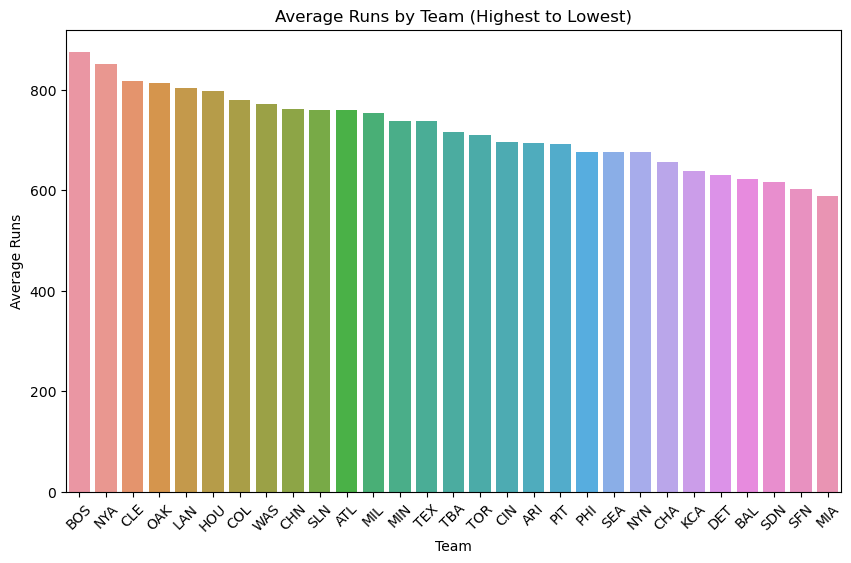

In [48]:
# Sorting the team_stats DataFrame by 'Runs' in descending order
sorted_team_stats = team_stats.sort_values('Runs', ascending=False)

# Creating the bar chart with sorted data
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_team_stats.index, y=sorted_team_stats['Runs'])
plt.title('Average Runs by Team (Highest to Lowest)')
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.show()


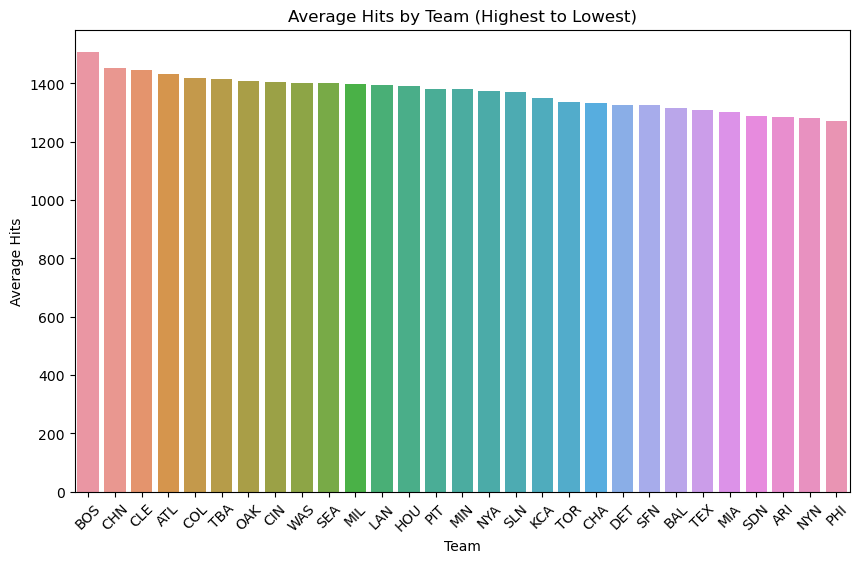

In [52]:
# Group by 'Team' and calculate average hits, then sort in descending order
team_stats = merged_df.groupby('Team')['Hits'].mean().sort_values(ascending=False)

# Creating the bar chart for average hits
plt.figure(figsize=(10, 6))
sns.barplot(x=team_stats.index, y=team_stats)
plt.title('Average Hits by Team (Highest to Lowest)')
plt.xlabel('Team')
plt.ylabel('Average Hits')
plt.xticks(rotation=45)
plt.show()

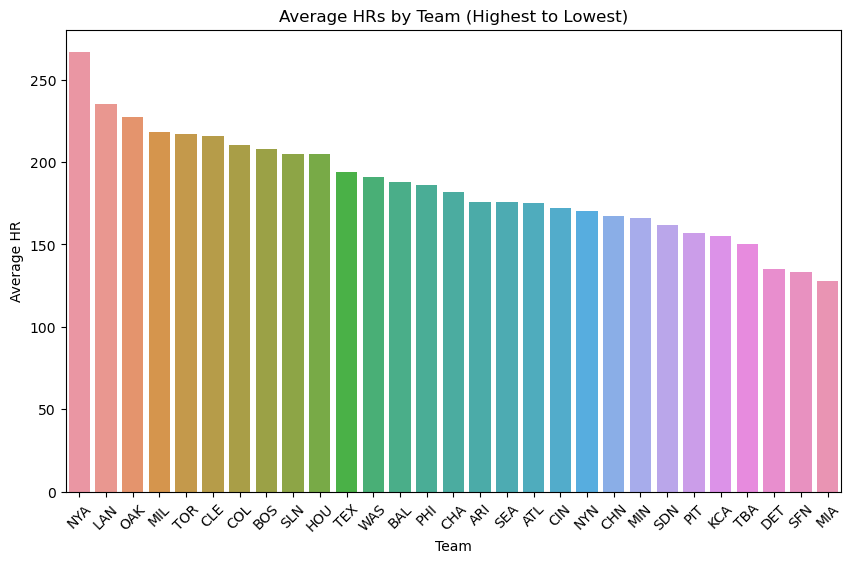

In [82]:
# Group by 'Team' and calculate average hits, then sort in descending order
team_stats = merged_df.groupby('Team')['Home Runs'].mean().sort_values(ascending=False)

# Creating the bar chart for average hits
plt.figure(figsize=(10, 6))
sns.barplot(x=team_stats.index, y=team_stats)
plt.title('Average HRs by Team (Highest to Lowest)')
plt.xlabel('Team')
plt.ylabel('Average HR')
plt.xticks(rotation=45)
plt.show()

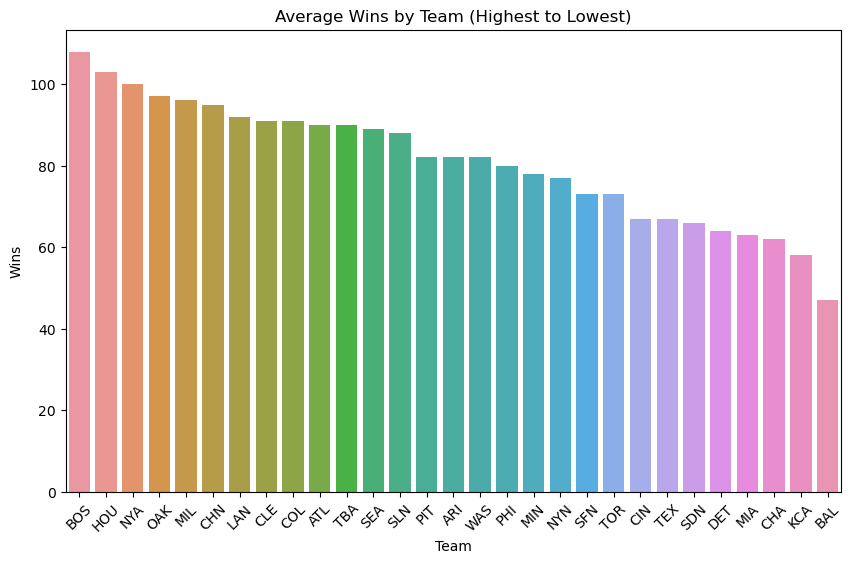

In [85]:
# Group by 'Team' and calculate average hits, then sort in descending order
team_stats = merged_df.groupby('Team')['Wins'].mean().sort_values(ascending=False)

# Creating the bar chart for average hits
plt.figure(figsize=(10, 6))
sns.barplot(x=team_stats.index, y=team_stats)
plt.title('Average Wins by Team (Highest to Lowest)')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.xticks(rotation=45)
plt.show()

Player stats 

In [94]:

# Group by 'name' (player) and calculate average home runs, then round to nearest integer
player_avg_hr = np.round(merged_df.groupby('name')['R'].mean(), 0)

# Convert player_avg_hr to a DataFrame and reset index
player_avg_hr_df = player_avg_hr.reset_index()

# Merging with original DataFrame to get team names
# Dropping duplicates in the original DataFrame to get unique name-Team pairs
unique_name_team = merged_df[['name', 'Team']].drop_duplicates()

# Merging the average home runs DataFrame with the unique name-Team DataFrame
merged_with_teams = pd.merge(player_avg_hr_df, unique_name_team, on='name')

# Sort by 'HR' (home runs) to get the top ten players
top_ten_players_with_teams = merged_with_teams.sort_values(by='R', ascending=False).head(10)

# Display the statistics for the top ten players along with their team names
print("Top Ten Players with the Most Runs:")
print(top_ten_players_with_teams[['name', 'R', 'Team']])

Top Ten Players with the Most Runs:
                 name      R Team
366      Mookie Betts  129.0  BOS
172  Francisco Lindor  129.0  CLE
91   Charlie Blackmon  119.0  COL
102  Christian Yelich  118.0  MIL
336    Matt Carpenter  111.0  SLN
200    J. D. Martinez  111.0  BOS
272      Jose Ramirez  110.0  CLE
386      Ozzie Albies  105.0  ATL
28       Alex Bregman  105.0  HOU
380     Nolan Arenado  104.0  COL


In [100]:
# Group by 'name' (player) and calculate average home runs, then round to nearest integer
player_avg_hr = np.round(merged_df.groupby('name')['HR'].mean(), 0)

# Convert player_avg_hr to a DataFrame and reset index
player_avg_hr_df = player_avg_hr.reset_index()

# Merging with original DataFrame to get team names
# Dropping duplicates in the original DataFrame to get unique name-Team pairs
unique_name_team = merged_df[['name', 'Team']].drop_duplicates()

# Merging the average home runs DataFrame with the unique name-Team DataFrame
merged_with_teams = pd.merge(player_avg_hr_df, unique_name_team, on='name')

# Sort by 'HR' (home runs) to get the top ten players
top_ten_players_with_teams = merged_with_teams.sort_values(by='HR', ascending=False).head(10)

# Display the statistics for the top ten players along with their team names
print("Top Ten Players with the Most Home Runs:")
print(top_ten_players_with_teams[['name', 'HR', 'Team']])


Top Ten Players with the Most Home Runs:
                  name    HR Team
296        Khris Davis  48.0  OAK
200     J. D. Martinez  43.0  BOS
242         Joey Gallo  40.0  TEX
272       Jose Ramirez  39.0  CLE
180  Giancarlo Stanton  38.0  NYA
380      Nolan Arenado  38.0  COL
172   Francisco Lindor  38.0  CLE
369        Nelson Cruz  37.0  SEA
471       Trevor Story  37.0  COL
336     Matt Carpenter  36.0  SLN


In [76]:
# Group by 'name' (player) and calculate average home runs, then round to nearest integer
player_avg_hr = np.round(merged_df.groupby('name')['RBI'].mean(), 0)

# Convert player_avg_hr to a DataFrame and reset index
player_avg_hr_df = player_avg_hr.reset_index()

# Merging with original DataFrame to get team names
# Dropping duplicates in the original DataFrame to get unique name-Team pairs
unique_name_team = merged_df[['name', 'Team']].drop_duplicates()

# Merging the average home runs DataFrame with the unique name-Team DataFrame
merged_with_teams = pd.merge(player_avg_hr_df, unique_name_team, on='name')

# Sort by 'HR' (home runs) to get the top ten players
top_ten_players_with_teams = merged_with_teams.sort_values(by='RBI', ascending=False).head(10)

# Display the statistics for the top ten players along with their team names
print("Top Ten Players with Most RBIs:")
print(top_ten_players_with_teams[['name', 'RBI', 'Team']])

Top Ten Players with Most RBIs:
                  name    RBI Team
200     J. D. Martinez  130.0  BOS
296        Khris Davis  123.0  OAK
220        Javier Baez  111.0  CHN
380      Nolan Arenado  110.0  COL
102   Christian Yelich  110.0  MIL
232      Jesus Aguilar  108.0  MIL
471       Trevor Story  108.0  COL
155  Edwin Encarnacion  107.0  CLE
272       Jose Ramirez  105.0  CLE
167     Eugenio Suarez  104.0  CIN


In [95]:
# Group by 'name' (player) and calculate average home runs, then round to nearest integer
player_avg_hr = np.round(merged_df.groupby('name')['H'].mean(), 0)

# Convert player_avg_hr to a DataFrame and reset index
player_avg_hr_df = player_avg_hr.reset_index()

# Merging with original DataFrame to get team names
# Dropping duplicates in the original DataFrame to get unique name-Team pairs
unique_name_team = merged_df[['name', 'Team']].drop_duplicates()

# Merging the average home runs DataFrame with the unique name-Team DataFrame
merged_with_teams = pd.merge(player_avg_hr_df, unique_name_team, on='name')

# Sort by 'HR' (home runs) to get the top ten players
top_ten_players_with_teams = merged_with_teams.sort_values(by='H', ascending=False).head(10)

# Display the statistics for the top ten players along with their team names
print("Top Ten Players with Most RBIs:")
print(top_ten_players_with_teams[['name', 'H', 'Team']])

Top Ten Players with Most RBIs:
                 name      H Team
487   Whit Merrifield  192.0  KCA
175   Freddie Freeman  191.0  ATL
200    J. D. Martinez  188.0  BOS
102  Christian Yelich  187.0  MIL
371  Nick Castellanos  185.0  DET
374     Nick Markakis  185.0  ATL
172  Francisco Lindor  183.0  CLE
91   Charlie Blackmon  182.0  COL
270       Jose Peraza  182.0  CIN
432   Scooter Gennett  181.0  CIN
